In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
# Cabin and Ticket columns have a lot of missing values, thus they aren't useful features
# We drop those two columns
data = data.drop(['Ticket','Cabin'], axis=1) 

# We also remove all rows with NaN in any column
data.fillna(data.mean(), inplace=True)

data.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,30.0708,C


#### More men died as compared to women

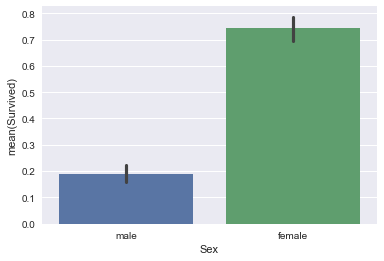

In [4]:
sns.barplot(x="Sex", y="Survived", data=data)

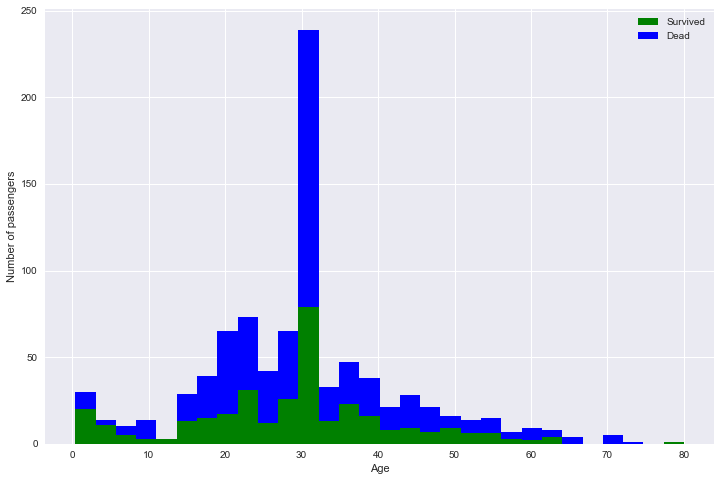

In [5]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist([data[data['Survived'] == 1]['Age'], data[data['Survived'] == 0]['Age']], stacked=True, color=['g','b'], bins=30,
         label=['Survived','Dead'])
ax.set_xlabel('Age') 
ax.set_ylabel('Number of passengers')
ax.legend()

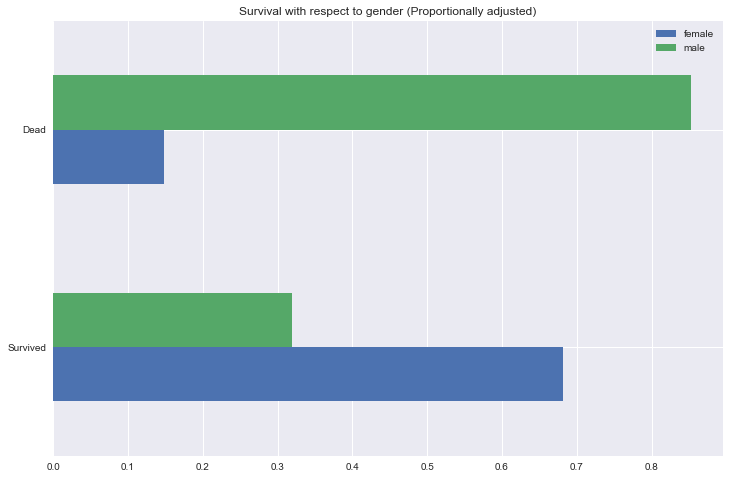

In [6]:
survived_sex = data[data['Survived'] == 1]['Sex'].value_counts().sort_index()
dead_sex = data[data['Survived'] == 0]['Sex'].value_counts().sort_index()

survived_sex = survived_sex / float(survived_sex.sum())
dead_sex = dead_sex / float(dead_sex.sum())

df_survived = pd.DataFrame([survived_sex, dead_sex])
df_survived.index = ['Survived','Dead']
df_survived.plot(kind='barh', figsize = (12, 8), title="Survival with respect to gender (Proportionally adjusted)")

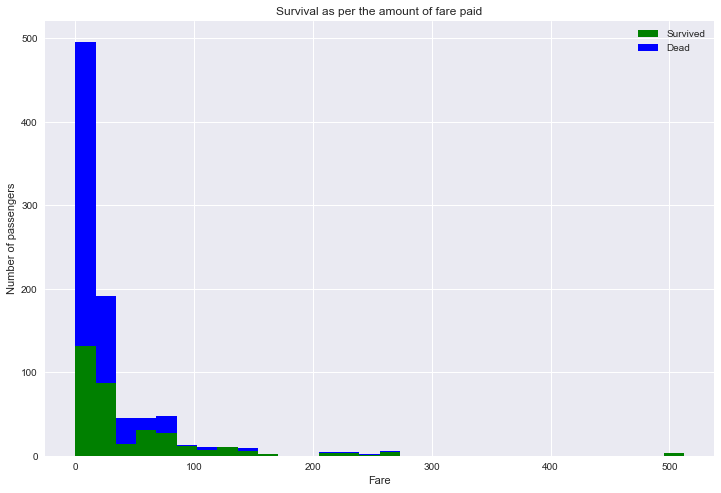

In [7]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist([data[data['Survived'] == 1]['Fare'], data[data['Survived'] == 0]['Fare']], stacked=True, color=['g','b'], bins=30,
         label=['Survived','Dead'])
ax.set_xlabel('Fare') 
ax.set_ylabel('Number of passengers')
ax.set_title("Survival as per the amount of fare paid")
ax.legend()

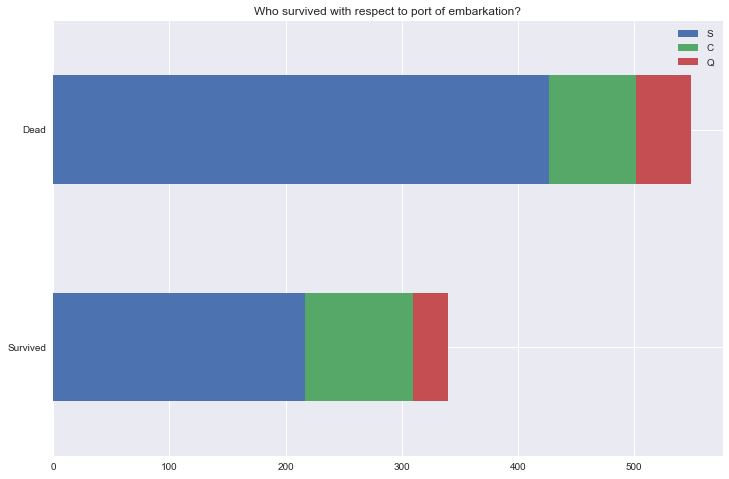

In [8]:
survived = data[data['Survived'] == 1]['Embarked'].value_counts()
dead = data[data['Survived'] == 0]['Embarked'].value_counts()

df_embarked = pd.DataFrame([survived, dead])
df_embarked.index = ['Survived', 'Dead']
df_embarked.plot(kind='barh', stacked=True, figsize = (12, 8), title="Who survived with respect to port of embarkation?")

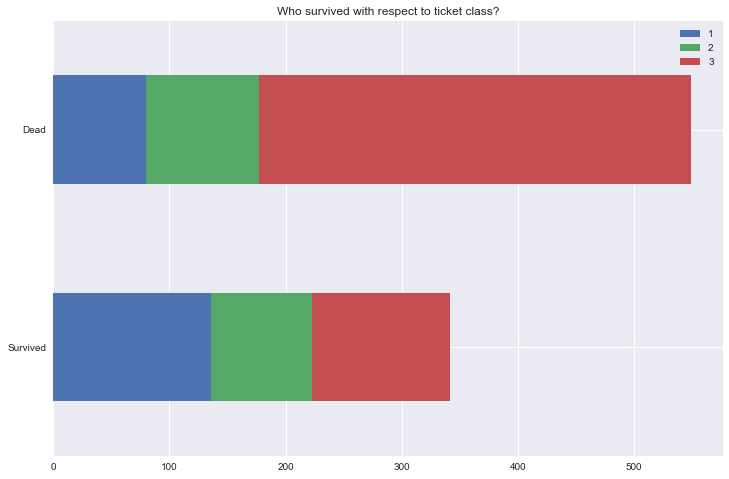

In [9]:
survived = data[data['Survived'] == 1]['Pclass'].value_counts()
dead = data[data['Survived'] == 0]['Pclass'].value_counts()

df_embarked = pd.DataFrame([survived, dead])
df_embarked.index = ['Survived', 'Dead']
df_embarked.plot(kind='barh', stacked=True, figsize = (12, 8), title="Who survived with respect to ticket class?")

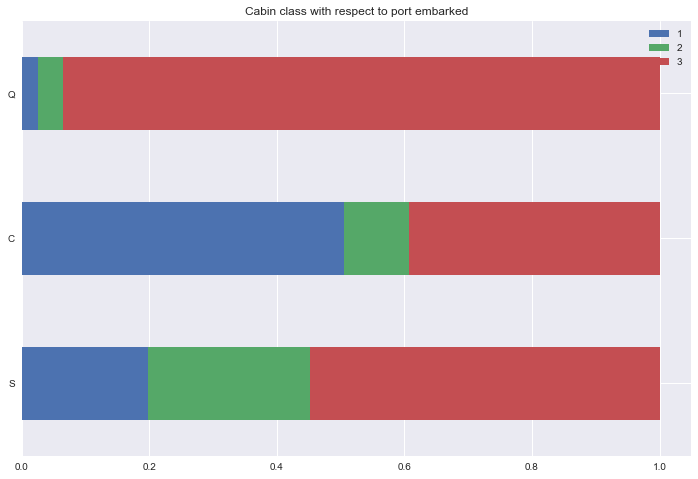

In [10]:
port_s = data[data['Embarked'] == 'S']['Pclass'].value_counts()
port_c = data[data['Embarked'] == 'C']['Pclass'].value_counts()
port_q = data[data['Embarked'] == 'Q']['Pclass'].value_counts()

# Adjust proportion
df_embark = pd.DataFrame([port_s / float(port_s.sum()), port_c / float(port_c.sum()), port_q / float(port_q.sum())])

df_embark.index = ["S", "C", 'Q']
df_embark.plot(kind='barh', stacked=True, figsize = (12, 8), title="Cabin class with respect to port embarked")

In [11]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [12]:
label_encoder = preprocessing.LabelEncoder()

data['Sex'] = label_encoder.fit_transform(data['Sex'].astype('str'))
data['Embarked'] = label_encoder.fit_transform(data['Embarked'].astype('str'))

data['FamilySize'] = data['SibSp'] + data['Parch']
data['Age*Class'] = data ['Age'] * data['Pclass']
data['Fare_Per_Person'] = data['Fare'] / (data['FamilySize']+1)

y = data['Survived']
X = data[['Sex', 'Age*Class', 'Embarked', 'Fare_Per_Person']]

# Training set
X_train = X.iloc[:600].values
y_train = y.iloc[:600].values

# Testing set
X_test = X.iloc[600:].values
y_test = y.iloc[600:].values

tuned_parameters = {'C': [0.1, 0.5, 1, 5, 10, 50, 100]}

clf = GridSearchCV(LogisticRegression(), tuned_parameters, cv=2)
clf.fit(X_train, y_train)

print(clf.score(X_test, y_test))

0.797250859107


In [13]:
test_df = pd.read_csv("test.csv")
test_df = test_df.drop(['Ticket','Cabin'], axis=1) 

test_df.head(n=10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,9.2250,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,7.6292,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,29.0000,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,7.2292,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,24.1500,S


In [14]:
# Fill NA age with median age
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df.fillna(test_df.mean(), inplace=True)
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [15]:
test_df['Sex'] = label_encoder.fit_transform(test_df['Sex'].astype('str'))
test_df['Embarked'] = label_encoder.fit_transform(test_df['Embarked'].astype('str'))
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch']

test_df['Age*Class'] = test_df['Age'] * test_df['Pclass']
test_df['Fare_Per_Person'] = test_df['Fare'] / (test_df['FamilySize'] + 1)

In [16]:
X = test_df[['Sex', 'Age*Class', 'Embarked', 'Fare_Per_Person']]
pred = clf.predict(X=X)

submission = pd.DataFrame({"PassengerId": test_df["PassengerId"], "Survived": pred})
submission.to_csv('titanic1.csv', index=False)